# SARIMA Milk Production

In [42]:
library(astsa)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'forecast'


The following object is masked from 'package:astsa':

    gas




In [33]:
milk <- read.csv('monthly-milk-production-pounds-p.csv')
head(milk)

,Month,Pounds
,<chr>,<dbl>
1,1962-01,578.3
2,1962-02,609.8
3,1962-03,628.4
4,1962-04,665.6
5,1962-05,713.8
6,1962-06,707.2


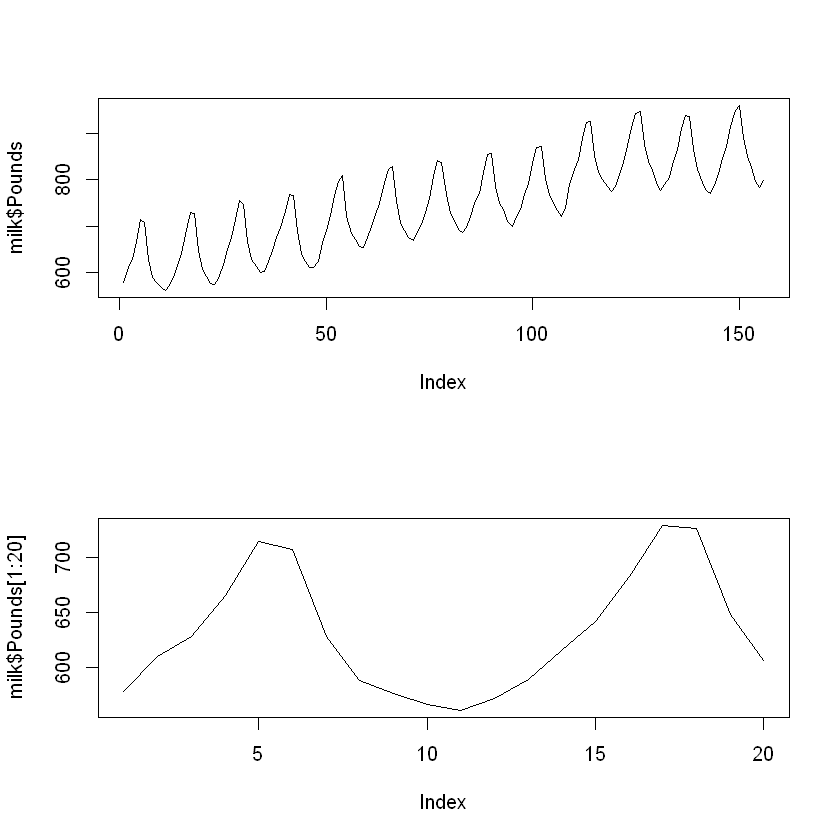

In [35]:
par(mfrow=c(2,1))
plot(milk$Pounds, type='l')
plot(milk$Pounds[1:20], type='l')

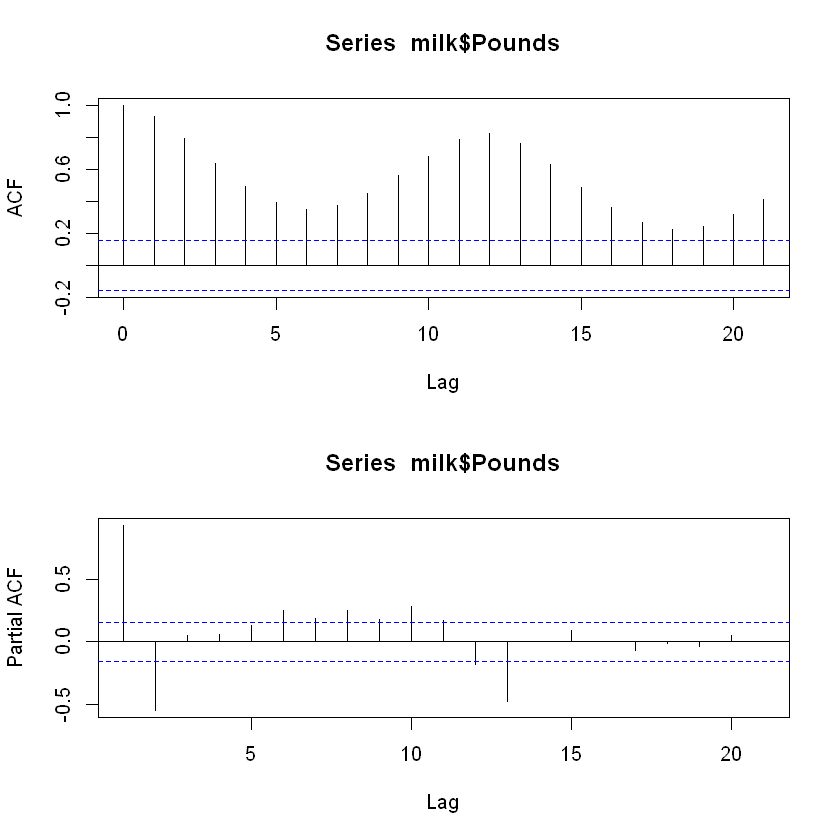

In [36]:
par(mfrow=c(2,1))
acf(milk$Pounds)
pacf(milk$Pounds)

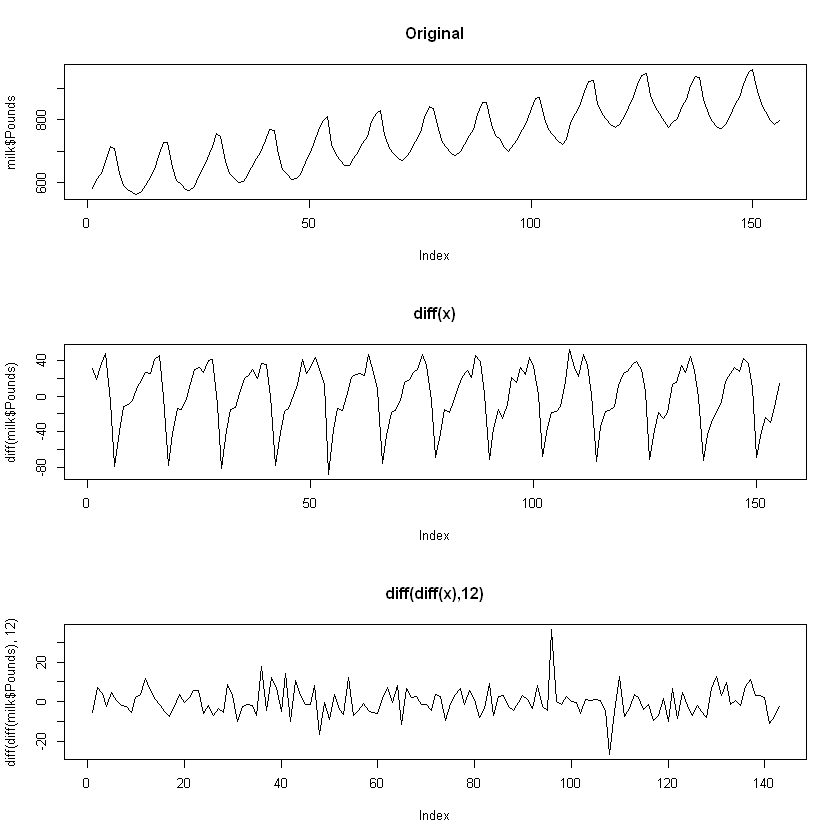

In [37]:
par(mfrow=c(3,1))
plot(milk$Pounds, type='l', main='Original')
plot(diff(milk$Pounds), type='l', main='diff(x)')
plot(diff(diff(milk$Pounds),12), type='l', main='diff(diff(x),12)')

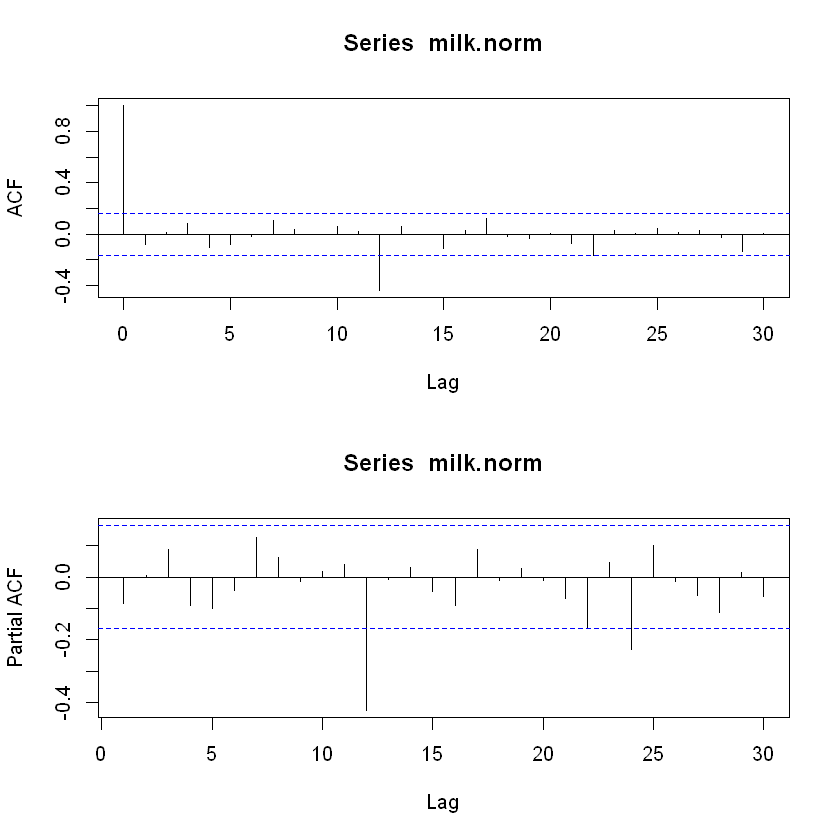

In [38]:
milk.norm = diff(diff(milk$Pounds),12)
par(mfrow=c(2,1))
acf(milk.norm, lag=30)
pacf(milk.norm, lag=30)

The order for MA and AR are both 0, but there are seasonal spikes at 12 and 24 for PACF and at 12 for ACF. So we will try:
- p = 0, q = 0
- P = 0,1,2
- Q = 0,1,2

In [39]:
DD=1
d = 1
per = 12
for(p in 1:1){
  for(q in 1:1){
    for(i in 1:3){
      for(j in 1:4){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=milk$Pounds, order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}

0 1 0 0 1 0 12 AIC= 968.3966  SSE= 7213.013  p-VALUE= 0.4393367 
0 1 0 0 1 1 12 AIC= 923.3288  SSE= 4933.349  p-VALUE= 0.6493728 
0 1 0 0 1 2 12 AIC= 925.3072  SSE= 4931.398  p-VALUE= 0.6529998 
0 1 0 0 1 3 12 AIC= 927.2329  SSE= 4925.911  p-VALUE= 0.6640233 
0 1 0 1 1 0 12 AIC= 938.6402  SSE= 5668.197  p-VALUE= 0.493531 
0 1 0 1 1 1 12 AIC= 925.3063  SSE= 4931.428  p-VALUE= 0.6531856 
0 1 0 1 1 2 12 AIC= 927.3036  SSE= 4931.135  p-VALUE= 0.6537708 
0 1 0 1 1 3 12 AIC= 929.2146  SSE= 4924.747  p-VALUE= 0.6627108 
0 1 0 2 1 0 12 AIC= 932.6438  SSE= 5308.012  p-VALUE= 0.6004804 
0 1 0 2 1 1 12 AIC= 927.2797  SSE= 4929.733  p-VALUE= 0.657349 
0 1 0 2 1 2 12 AIC= 926.8053  SSE= 4618.498  p-VALUE= 0.6826743 


Smallest AIC is for `0 1 0 0 1 1 12 AIC= 923.3288  SSE= 4933.349  p-VALUE= 0.6493728`.

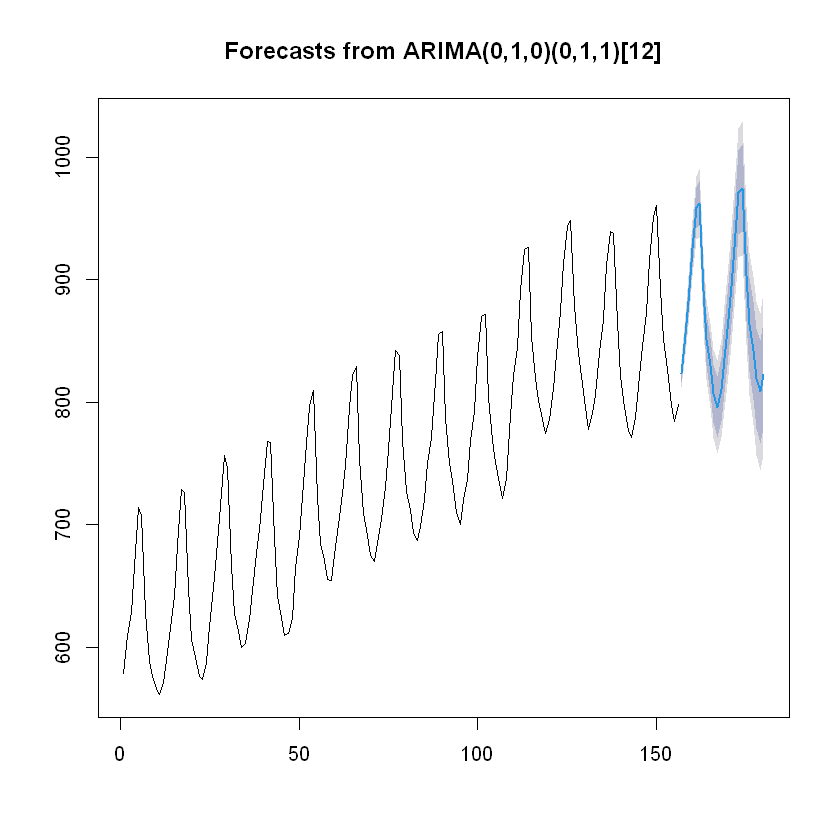

In [43]:
model<- arima(x=milk$Pounds, order = c(0,1,0), seasonal = list(order=c(0,1,1), period=12))
plot(forecast(model))